load data
plot data

In [1]:
import numpy as np
import pickle
import pandas as pd
import time
from umap import UMAP

In [2]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

In [3]:
from tfumap.paths import FIGURE_DIR, save_fig

In [4]:
save_loc = DATA_DIR / 'reconstruction_speed' 

In [5]:
datasets = [
    #'cassins_dtw',
    'cifar10',
    'fmnist',
    #'macosko2015',
    'mnist'
]

In [6]:
recon_speeds = pd.concat([pd.read_pickle(save_loc / (dataset + '.pickle')) for dataset in datasets])
recon_speeds['ex/ms'] = np.array(recon_speeds["speed"]/recon_speeds["nex"] * 1000).astype('float32')
recon_speeds[:3]

,method_,dimensions,dataset,embed_time,recon_time,speed,nex,ex/ms
0,network,2,cifar10,0.114858,0.091563,0.206421,10000,0.020642
1,network,2,cifar10,0.086900,0.003268,0.090168,10000,0.009017
2,network,2,cifar10,0.123886,0.003581,0.127467,10000,0.012747


In [8]:
median_df = (
    recon_speeds[["method_", "dimensions", "dataset", "ex/ms"]]
    .groupby(["method_", "dimensions", "dataset"])
    .median()
)
median_df = median_df.T.melt()
median_df

,method_,dimensions,dataset,value
0,network,2,cifar10,0.012397
1,network,2,fmnist,0.019489
2,network,2,mnist,0.019271
3,network,64,cifar10,0.012432
4,network,64,fmnist,0.020449
5,network,64,mnist,0.019518
6,network-cpu,2,cifar10,0.107470
7,network-cpu,2,fmnist,0.200867
8,network-cpu,2,mnist,0.210137
9,network-cpu,64,cifar10,0.106641


In [9]:
import seaborn as sns

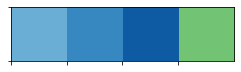

In [10]:
palette = sns.color_palette('Blues', 5)[2:] + sns.color_palette('Greens', 1)
sns.palplot(palette)

Text(0.5, 1, '64 Dimensions')

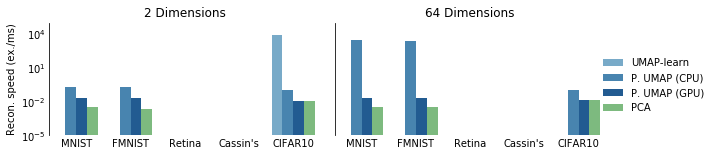

In [11]:
fg = sns.catplot(
    x="dataset",
    y="value",
    hue="method_",
    hue_order=["umap-learn", "network-cpu", "network",  "pca"],
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dimensions",
    height=2.5, 
    aspect=1.75,
    data=median_df,
    kind="bar",
    palette=palette,
    #legend=False
)
(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "Recon. speed (ex./ms)")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
fg._legend._legend_title_box._text.set_text("")
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP-learn')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network-cpu'))[0][0]].set_text('P. UMAP (CPU)')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network'))[0][0]].set_text('P. UMAP (GPU)')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'pca'))[0][0]].set_text('PCA')
#fg._legend.texts[3].set_text("PCA")
#ax.set_ylim([1e-10,1e-3])
ax.set_yscale('log'); ax.set_ylim([1e-5,1e5]);
#fg._legend.texts[2].set_text("Param. UMAP")

ax.set_title('2 Dimensions')
ax = fg.axes[0][1]
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('64 Dimensions')
#ax.set_yscale('log')

#save_fig(FIGURE_DIR/'recon_speed', save_pdf=True, dpi=300, pad_inches=0.1)